Load data from directory and dump into pickle file to use later.

In [40]:
import pickle
from tqdm import tqdm
import numpy as np

import os 
def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for path in tqdm(dirs):
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in tqdm(file_paths):
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-16") as f:
                lines = f.read()
                X.append(lines)
                y.append(path)

    return X, y

dir_path="/content/drive/MyDrive/Colab Notebooks/FinalProject/Data/Train_Full"
X_data,y_data = get_data(dir_path)
pickle.dump(X_data, open('/content/drive/MyDrive/Colab Notebooks/FinalProject/Data/10_topic_train_data.pkl', 'wb'))
pickle.dump(y_data, open('/content/drive/MyDrive/Colab Notebooks/FinalProject/Data/10_topic_train_label.pkl', 'wb'))

  0%|          | 0/10 [00:00<?, ?it/s]
0it [00:00, ?it/s]
 10%|█         | 1/10 [00:00<00:03,  2.75it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
100%|██████████| 10/10 [12:09<00:00, 72.98s/it] 


Load data from pickle

In [3]:
import pickle
from tqdm import tqdm
import numpy as np

import os 
data = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/FinalProject/Data/10_topic_train_data.pkl', 'rb'))
print(len(data),len(set(i for i in data)))

22641 22641


Join paragraphs into a sentences, split by "."

In [4]:
import re
alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'
training_data=[]
for i in data:
  i=i.replace("\n",".")
  sentences=i.split(".")
  for j in sentences:
      if len(j.split()) > 2 and re.match(alphabet, j.lower()):
          training_data.append(j)
print(len(training_data))

402388


Release data when having training data .Install module removes tones

In [5]:
del data
!pip install unidecode # 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.0 MB/s 


Check training data.

In [6]:
print(training_data[-10:])

['Tuy nhiên, mực nước ngập cao nhất thuộc về đường Thái Phiên (quận 11), có chỗ nước lên đến 70 cm, đã gây không ít khó khăn cho công việc kinh doanh buôn bán của các tiểu thương nơi đây', 'Tương tự, đường Tân Hòa Đông (quận 6) đang được thi công hệ thống thoát nước cùng với việc duy tu sửa chữa đường, nên nhiều phương tiện lưu thông trên tuyến đường này đã bị chết máy hàng loạt do sa xuống cống, trong đó không ít trường hợp phải đi cấp cứu', ' Tổng thiệt hại ước tính sơ bộ hơn 2 tỷ đồng', 'Kỷ niệm 100 năm ngày sinh Tổng bí thư Trần Phú', 'Sáng nay, lễ mít tinh kỷ niệm đã được tổ chức trọng thể tại hội trường Ba Đình (Hà Nội)', 'Phát biểu tại lễ kỷ niệm, Ủy viên Bộ chính trị, Thường trực ban bí thư Phan Diễn khẳng định, với những chủ trương, quyết sách sáng suốt, Tổng bí thư Trần Phú đã có những đóng góp lớn trong thời kỳ xây dựng Đảng và các tổ chức quần chúng', 'Thay mặt tuổi trẻ thủ đô, em Châu Kim Tuyến, học sinh lớp 11, THPT Trần Phú (Hà Nội), xúc động nói: "Tấm gương hy sinh dũng

Define spell error type.

In [7]:
import re
import numpy as np
from unidecode import unidecode
# some common Vietnamese spell mistake
letters=list("abcdefghijklmnopqrstuvwxyzáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđABCDEFGHIJKLMNOPQRSTUVWXYZÁÀẢÃẠÂẤẦẨẪẬĂẮẰẲẴẶÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÉÈẺẼẸÊẾỀỂỄỆÚÙỦŨỤƯỨỪỬỮỰÍÌỈĨỊÝỲỶỸỴĐ")
letters2=list("abcdefghijklmnopqrstuvwxyz")

typo={"ă":"aw","â":"aa","á":"as","à":"af","ả":"ar","ã":"ax","ạ":"aj","ắ":"aws","ổ":"oor","ỗ":"oox","ộ":"ooj","ơ":"ow",
"ằ":"awf","ẳ":"awr","ẵ":"awx","ặ":"awj","ó":"os","ò":"of","ỏ":"or","õ":"ox","ọ":"oj","ô":"oo","ố":"oos","ồ":"oof",
"ớ":"ows","ờ":"owf","ở":"owr","ỡ":"owx","ợ":"owj","é":"es","è":"ef","ẻ":"er","ẽ":"ex","ẹ":"ej","ê":"ee","ế":"ees","ề":"eef",
"ể":"eer","ễ":"eex","ệ":"eej","ú":"us","ù":"uf","ủ":"ur","ũ":"ux","ụ":"uj","ư":"uw","ứ":"uws","ừ":"uwf","ử":"uwr","ữ":"uwx",
"ự":"uwj","í":"is","ì":"if","ỉ":"ir","ị":"ij","ĩ":"ix","ý":"ys","ỳ":"yf","ỷ":"yr","ỵ":"yj","đ":"dd",
"Ă":"Aw","Â":"Aa","Á":"As","À":"Af","Ả":"Ar","Ã":"Ax","Ạ":"Aj","Ắ":"Aws","Ổ":"Oor","Ỗ":"Oox","Ộ":"Ooj","Ơ":"Ow",
"Ằ":"AWF","Ẳ":"Awr","Ẵ":"Awx","Ặ":"Awj","Ó":"Os","Ò":"Of","Ỏ":"Or","Õ":"Ox","Ọ":"Oj","Ô":"Oo","Ố":"Oos","Ồ":"Oof",
"Ớ":"Ows","Ờ":"Owf","Ở":"Owr","Ỡ":"Owx","Ợ":"Owj","É":"Es","È":"Ef","Ẻ":"Er","Ẽ":"Ex","Ẹ":"Ej","Ê":"Ee","Ế":"Ees","Ề":"Eef",
"Ể":"Eer","Ễ":"Eex","Ệ":"Eej","Ú":"Us","Ù":"Uf","Ủ":"Ur","Ũ":"Ux","Ụ":"Uj","Ư":"Uw","Ứ":"Uws","Ừ":"Uwf","Ử":"Uwr","Ữ":"Uwx",
"Ự":"Uwj","Í":"Is","Ì":"If","Ỉ":"Ir","Ị":"Ij","Ĩ":"Ix","Ý":"Ys","Ỳ":"Yf","Ỷ":"Yr","Ỵ":"Yj","Đ":"Dd"}

region={"ẻ":"ẽ","ẽ":"ẻ","ũ":"ủ","ủ":"ũ","ã":"ả","ả":"ã","ỏ":"õ","õ":"ỏ","i":"j"}
region2={"s":"x","l":"n","n":"l","x":"s","d":"gi","S":"X","L":"N","N":"L","X":"S","Gi":"D","D":"Gi"}

vowel=list("aeiouyáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵ")

acronym={"không":"ko"," anh":" a","em":"e","biết":"bít","giờ":"h","gì":"j","muốn":"mún","học":"hok","yêu":"iu",
         "chồng":"ck","vợ":"vk"," ông":" ô","được":"đc","tôi":"t",
         "Không":"Ko"," Anh":" A","Em":"E","Biết":"Bít","Giờ":"H","Gì":"J","Muốn":"Mún","Học":"Hok","Yêu":"Iu",
         "Chồng":"Ck","Vợ":"Vk"," Ông":" Ô","Được":"Đc","Tôi":"T",}

teen={"ch":"ck","ph":"f","th":"tk","nh":"nk",
      "Ch":"Ck","Ph":"F","Th":"Tk","Nh":"Nk"}

Functions to add noise

In [8]:
def teen_code(sentence,pivot):
    random = np.random.uniform(0,1,1)[0]
    new_sentence=str(sentence)
    if random>pivot:
        for word in acronym.keys():
            if re.search(word, new_sentence):
                random2 = np.random.uniform(0,1,1)[0]
                if random2 <0.5:
                    new_sentence=new_sentence.replace(word,acronym[word])
        for word in teen.keys(): 
            if re.search(word, new_sentence):
                random3 = np.random.uniform(0,1,1)[0]
                if random3 <0.05:
                    new_sentence=new_sentence.replace(word,teen[word])        
        return new_sentence
    else:
        return sentence
    

def add_noise(sentence, pivot1,pivot2):
    sentence=teen_code(sentence,0.5)
    noisy_sentence = ""
    i = 0
    while i < len(sentence):
        if sentence[i] not in letters:
            noisy_sentence+=sentence[i]
        else: 
            random = np.random.uniform(0,1,1)[0]   
            if random < pivot1:
                noisy_sentence+=(sentence[i])
            elif random<pivot2:
                if sentence[i] in typo.keys() and sentence[i] in region.keys():
                    random2=np.random.uniform(0,1,1)[0]
                    if random2<=0.4:
                        noisy_sentence+=typo[sentence[i]]
                    elif random2<0.8:
                        noisy_sentence+=region[sentence[i]]
                    elif random2<0.95 :
                        noisy_sentence+=unidecode(sentence[i])
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in typo.keys():
                    random3=np.random.uniform(0,1,1)[0]
                    if random3<=0.6:
                        noisy_sentence+=typo[sentence[i]]
                    elif random3<0.9 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in region.keys():
                    random4=np.random.uniform(0,1,1)[0]
                    if random4<=0.6:
                        noisy_sentence+=region[sentence[i]]
                    elif random4<0.85 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif i<len(sentence)-1 :
                    if sentence[i] in region2.keys() and (i==0 or sentence[i-1] not in letters) and sentence[i+1] in vowel:
                        random5=np.random.uniform(0,1,1)[0]
                        if random5<=0.9:
                            noisy_sentence+=region2[sentence[i]]
                        else:
                            noisy_sentence+=sentence[i]
                    else:
                        noisy_sentence+=sentence[i]

            else:
                new_random = np.random.uniform(0,1,1)[0]
                if new_random <=0.33:
                    if i == (len(sentence) - 1):
                        continue
                    else:
                        noisy_sentence+=(sentence[i+1])
                        noisy_sentence+=(sentence[i])
                        i += 1
                elif new_random <= 0.66:
                    random_letter = np.random.choice(letters2, 1)[0]
                    noisy_sentence+=random_letter
                else:
                    pass
      
        i += 1
    return noisy_sentence

Function to extract phrases.

In [9]:
def extract_phrases(text):
    return re.findall(r'\w[\w ]+', text)

Extract phrases

In [10]:
import itertools
phrases = itertools.chain.from_iterable(extract_phrases(text) for text in training_data)
phrases = [p.strip() for p in phrases if len(p.split()) > 1]

print(len(phrases))
print(phrases[-10:])

963914
['xúc động nói', 'Tấm gương hy sinh dũng cảm của Tổng bí thư Trần Phú và các chiến sĩ cách mạng khác luôn khiến chúng em cảm phục', 'Trần Phú sinh tại xã Tùng Ảnh', 'huyện Đức Thọ', 'tỉnh Hà Tĩnh trong một gia đình nhà nho yêu nước', 'Năm 1924', 'thày giáo Trần Phú gia nhập Hội Việt Nam cách mạng thanh niên và một năm sau được cử đi học ĐH Phương Đông', 'trung tâm đào tạo lãnh tụ cách mạng cho các dân tộc thuộc địa', 'Năm đó', 'vị lãnh tụ cách mạng mới 26 tuổi']


Generate word dictionary

In [12]:
from nltk import ngrams
import string
import numpy as np
from tqdm import tqdm

# divide document into 5-grams 
# a single Vietnamese word cant contain more than 7 characters (nghiêng)
NGRAM = 5 
MAXLEN = 40
def gen_ngrams(words, n=5):
    return ngrams(words.split(), n)
   
list_ngrams = []
for p in tqdm(phrases):
  if not re.match(alphabet, p.lower()):
    continue
  for ngr in gen_ngrams(p, NGRAM):
    if len(" ".join(ngr)) < MAXLEN:
      list_ngrams.append(" ".join(ngr))

del phrases
list_ngrams = list((list_ngrams))
print(len(list_ngrams))

100%|██████████| 963914/963914 [00:13<00:00, 72392.91it/s]


5795245


Define alphabet

In [13]:
alphabet = ['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
print(len(alphabet))

199


Functions to encode and decode

In [14]:
def encoder_data(text, maxlen=MAXLEN):
        text = "\x00" + text
        x = np.zeros((maxlen, len(alphabet)))
        for i, c in enumerate(text[:maxlen]):
            x[i, alphabet.index(c)] = 1
        if i < maxlen - 1:
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        return x
      
def decoder_data(x):
    x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)

In [20]:
text = "Trường đại học bách khoa Đà nẵng"
print(encoder_data(text).shape)
print(decoder_data(encoder_data(text)))

(40, 199)
 Trường đại học bách khoa Đà nẵng       


Build model

In [21]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense,LSTM, Bidirectional
from keras.callbacks import Callback, ModelCheckpoint
from keras.optimizers import Adam

Add layer

In [22]:
encoder=LSTM(256,input_shape=(MAXLEN, len(alphabet)), return_sequences=True)

In [23]:
decoder=Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))

In [24]:
model=Sequential()
model.add(encoder)
model.add(decoder)
model.add(TimeDistributed(Dense(256)))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))

Compile model

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 256)           466944    
                                                                 
 bidirectional (Bidirectiona  (None, 40, 512)          1050624   
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 40, 256)          131328    
 ibuted)                                                         
                                                                 
 activation (Activation)     (None, 40, 256)           0         
                                                                 
 time_distributed_1 (TimeDis  (None, 40, 199)          51143     
 tributed)                                                       
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Visualize model layers

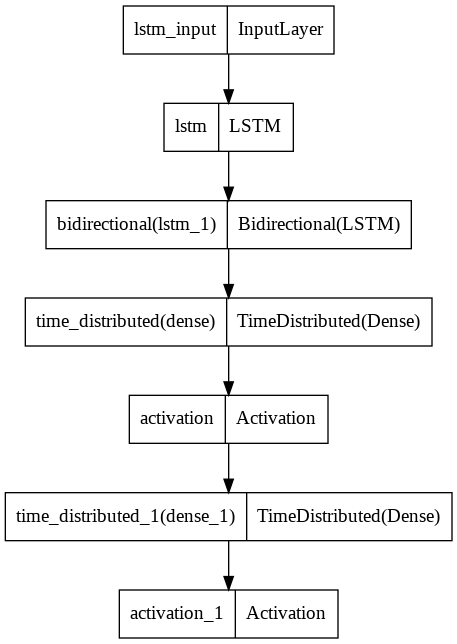

In [26]:
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/FinalProject/model.png')

Split data to train set and validation set

In [27]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams, test_size=0.2, random_state=42)

Function Add noise to data

In [28]:
BATCH_SIZE = 512
def generate_data(data, batch_size):
    cur_index = 0
    while True:
        x, y = [], []
        for i in range(batch_size):  
            y.append(encoder_data(data[cur_index]))
            x.append(encoder_data(add_noise(data[cur_index],0.94,0.985)))
            cur_index += 1
            if cur_index > len(data)-1:
                cur_index = 0
        yield np.array(x), np.array(y)

Train model

In [ ]:
import os
train_generator = generate_data(train_data, batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data, batch_size=BATCH_SIZE)


# train the model and save to the Model folder
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/FinalProject/{val_acc:.2f}.h5', save_best_only=True, verbose=1)
model.fit_generator(
    train_generator, 
    steps_per_epoch=len(train_data)//BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(valid_data)//BATCH_SIZE,
    callbacks=[checkpointer]
)

Load model to test

In [29]:
from tensorflow.keras.models import load_model
import sys
if not sys.warnoptions:
	import warnings

	warnings.simplefilter("ignore")
training_model = load_model("/content/drive/MyDrive/Colab Notebooks/FinalProject/model_spell_.h5", compile=False)

Function to test

In [31]:
import string
letters = list(
	"abcdefghijklmnopqrstuvwxyzáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđABCDEFGHIJKLMNOPQRSTUVWXYZÁÀẢÃẠÂẤẦẨẪẬĂẮẰẲẴẶÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÉÈẺẼẸÊẾỀỂỄỆÚÙỦŨỤƯỨỪỬỮỰÍÌỈĨỊÝỲỶỸỴĐ")
accepted_char = list((string.digits + ''.join(letters)))

In [33]:
from collections import Counter
def nltk_ngrams(words, n=5):
    return ngrams(words.split(), n)
      
def guess(ngram):
    text = ' '.join(ngram)
    preds = training_model.predict(np.array([encoder_data(text)]), verbose=0)
    return decoder_data(preds[0]).strip('\x00')

def correct(sentence):
    for i in sentence:
        if i not in accepted_char:
            sentence=sentence.replace(i," ")
    ngrams = list(nltk_ngrams(sentence, n=NGRAM))
    guessed_ngrams = list(guess(ngram) for ngram in ngrams)
    candidates = [Counter() for _ in range(len(guessed_ngrams) + NGRAM - 1)]
    for nid, ngram in (enumerate(guessed_ngrams)):
        for wid, word in (enumerate(re.split(' +', ngram))):
            candidates[nid + wid].update([word])
            
    output = ' '.join(c.most_common(1)[0][0] for c in candidates)  
    return output

Test

In [39]:
text_wrong_2 = "Trường đại học bách khoa thật nà buồi"
text_wrong_noise = add_noise(text_wrong_2,0.94,0.985)
print("Input: ",text_wrong_noise)
output_2 = correct(text_wrong_2)
print("Output: ",output_2)

Input:  Trưnờg đại học bách khoa thậe nà buồi
Output:  Trường đại học bách khoa thật là buồi


Evaluate Model

In [49]:
data_test = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/FinalProject/Data/10_topic_test_data.pkl', 'rb'))

In [51]:
test_data=[]
alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'
for i in data_test:
  i=i.replace("\n",".")
  sentences=i.split(".")
  for j in sentences:
      if len(j.split()) > 2 and re.match(alphabet, j.lower()):
          test_data.append(j)

In [53]:
phrases_test = itertools.chain.from_iterable(extract_phrases(text) for text in test_data)
phrases_test = [p.strip() for p in phrases_test if len(p.split()) > 1]

In [55]:
list_ngrams_test = []
for p in tqdm(phrases_test):
  if not re.match(alphabet, p.lower()):
    continue
  for ngr in gen_ngrams(p, NGRAM):
    if len(" ".join(ngr)) < MAXLEN:
      list_ngrams_test.append(" ".join(ngr))

del phrases_test
list_ngrams_test = list((list_ngrams_test))
print(len(list_ngrams_test))

100%|██████████| 1761806/1761806 [00:28<00:00, 61898.07it/s]


10753952


In [56]:
alphabet = ['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
print(len(alphabet))

199


In [58]:
test_generator = generate_data(list_ngrams_test, batch_size=BATCH_SIZE)

In [ ]:
eval_model = load_model('/content/drive/MyDrive/Colab Notebooks/FinalProject/model_spell_.h5')
eval_model.evaluate_generator(test_generator,steps=len(list_ngrams_test)//BATCH_SIZE,verbose=1)

<ipython-input-60-abeee488c4e3>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_model.evaluate_generator(test_generator,steps=len(list_ngrams_test)//BATCH_SIZE,verbose=1)


  503/21003 [..............................] - ETA: 10:11:58 - loss: 0.0416 - accuracy: 0.9884